In [2]:
#product sentiment analysis using decision tree classifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [3]:
df = pd.read_csv('fashion_products.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


In [4]:
df.isnull().sum()
df.dropna(inplace=True)
df['Review_Label'] = df['Rating'].apply(lambda x: 1 if x >= 3 else 0)

In [5]:
X = df[['User ID', 'Price', 'Product ID']]
y = df['Review_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [7]:
print("Random Forest Accuracy:", accuracy_score(y_test, predictions))

Random Forest Accuracy: 0.475


In [8]:
uid = int(input("Enter User ID: "))
price = float(input("Enter Price: "))
pid = int(input("Enter Product ID: "))
user_input = np.array([[uid, price, pid]])
prediction = model.predict(user_input)[0]
print("Review:", "Positive" if prediction == 1 else "Negative")

Review: Positive


c:\python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


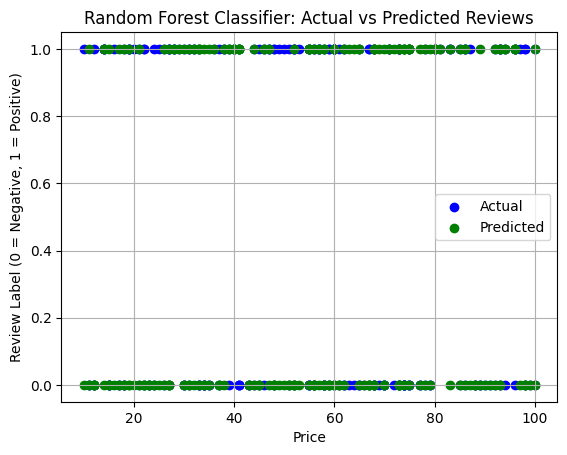

In [9]:
plt.scatter(X_test['Price'], y_test, color='blue', label='Actual') 
plt.scatter(X_test['Price'], predictions, color='green', label='Predicted') 
plt.title('Random Forest Classifier: Actual vs Predicted Reviews')
plt.xlabel('Price')
plt.ylabel('Review Label (0 = Negative, 1 = Positive)')
plt.legend()
plt.grid(True)
plt.show()